<a href="https://colab.research.google.com/github/Idaogah/DEV_ML_AI/blob/main/Nonlinear_Noise_Estimation_Using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Nonlinear Noise Estimation Using Machine Learning**
- By Ogah Ida &copy; 2024

## **1. Abstract**
Noise estimation is crucial in many real-world scenarios, particularly with nonlinear systems where conventional linear methods may not suffice. This project investigates nonlinear noise estimation through machine learning approaches. We utilize Linear Regression, Polynomial Regression, and Neural Networks to assess and mitigate noise in a synthetically created dataset with nonlinear noise characteristics. The findings indicate that although Linear Regression has difficulty with nonlinear patterns, both Polynomial Regression and Neural Networks enhance the precision of noise estimation. Notably, the Neural Network model exhibited superior performance, suggesting its potential as an effective method for managing intricate nonlinear noise.

## **2. Introduction**

In signal processing and data analysis, noise estimation is an essential component. These signals are often tainted by various kinds of noise. For example, when a sinusoidal input voltage is applied to a diode circuit system, the output is no longer a simple sinusoid but may be rectified, meaning the negative half of the signal is clipped, resulting in a highly distorted waveform. In Biological Systems such as the Neural Networks in the Brain, a neuron firing rates exhibit nonlinear dynamics where small changes in input can produce large changes in output, or conversely, large inputs might be suppressed to product minimal response due to inhibitory effects. Linear noise can be easily estimated using standard techniques like moving averages or Fourier transforms, but nonlinear noise requires more sophisticated approaches. Machine learning techniques, especially neural networks and regression methods can provide a better option for estimating noise in nonlinear systems.

## **3. Research Objective**
The objective of this project is to use machine learning techniques to estimate and remove nonlinear noise from a noisy signal. We will compare the performance of various models such as Linear Regression, Polynomial Regression, and Neural Networks to demonstrate their effectiveness in noise estimation.

## **4. Methodology**

To simulate a noisy nonlinear signal, we generated a sine wave as the true signal and corrupted the dataframe with nonlinear noise using random functions. This provided a challenging dataset for noise estimation.
This project uses Google Colab and python programming language for implemenation, and the following scripts shows the process.

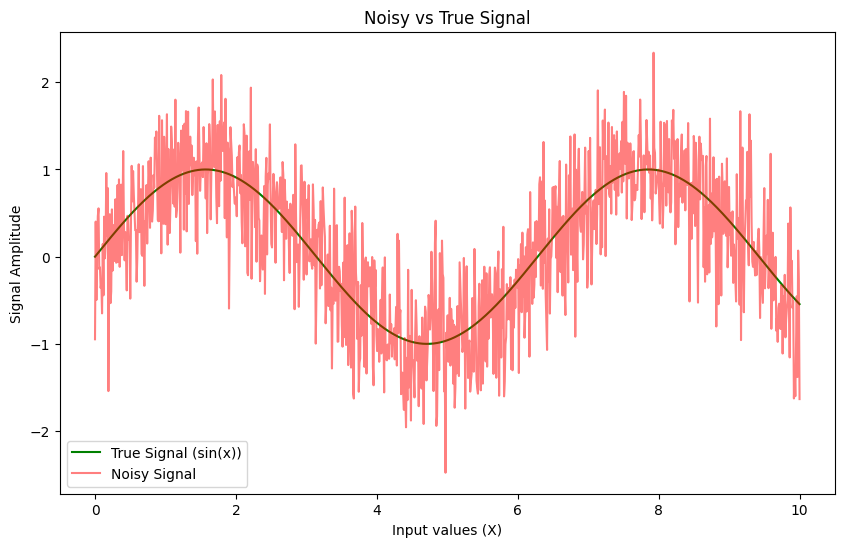

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generating a nonlinear signal (sinusoidal function with added noise)
def generate_data(n_samples=1000, noise_factor=0.5):
    X = np.linspace(0, 10, n_samples)
    # Nonlinear signal: sin(x)
    y_true = np.sin(X)
    # Adding nonlinear noise (random noise scaled by noise_factor)
    noise = noise_factor * np.random.randn(n_samples)
    y_noisy = y_true + noise
    return X, y_true, y_noisy

# Generate data
X, y_true, y_noisy = generate_data()

# Plotting the true signal vs noisy signal
plt.figure(figsize=(10, 6))
plt.plot(X, y_true, label='True Signal (sin(x))', color='green')
plt.plot(X, y_noisy, label='Noisy Signal', color='red', alpha=0.5)
plt.legend()
plt.title('Noisy vs True Signal')
plt.xlabel('Input values (X)')
plt.ylabel('Signal Amplitude')
plt.show()


## **5. Model Selection**
To solve the problem of nonlinear noise estimation, we employed three models:

- Linear Regression: A baseline model to illustrate the limitations in handling nonlinear data.
- Polynomial Regression: A nonlinear regression technique to improve noise estimation.
- Neural Networks: A more advanced machine learning model capable of learning complex patterns in the data.

We start training the model with Linear Regression as a baseline. This was followed by nonlinear Polynomial Regression) and a simple Neural Network.

## 5.1. Linear Regression Baseline Model:

Linear Regression attempts to fit a straight line to the data. While it can handle linear relationships well, it struggles with nonlinear noise.

Linear Regression MSE: 0.4409959721723537


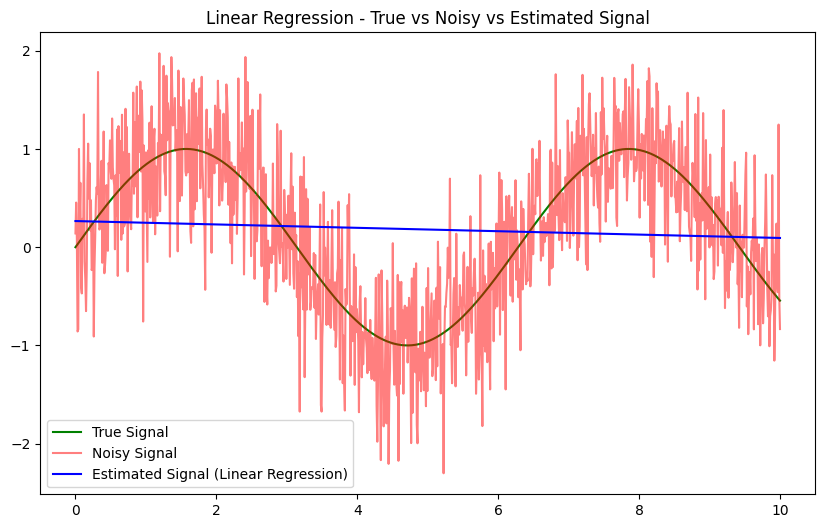

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Reshaping the data
X_reshaped = X.reshape(-1, 1)

# Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_reshaped, y_noisy)

# Predicting the noise
y_pred = linear_model.predict(X_reshaped)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_true, y_pred)
print(f"Linear Regression MSE: {mse}")

# Plotting the estimated signal
plt.figure(figsize=(10, 6))
plt.plot(X, y_true, label='True Signal', color='green')
plt.plot(X, y_noisy, label='Noisy Signal', color='red', alpha=0.5)
plt.plot(X, y_pred, label='Estimated Signal (Linear Regression)', color='blue')
plt.legend()
plt.title('Linear Regression - True vs Noisy vs Estimated Signal')
plt.show()


## 5.2. Polynomial Regression Model:
Polynomial Regression with Scikit-learn uses a polynomial function to fit the data, making it more suited to capturing nonlinear relationships.

Polynomial Regression (degree=3) MSE: 0.32972292049876


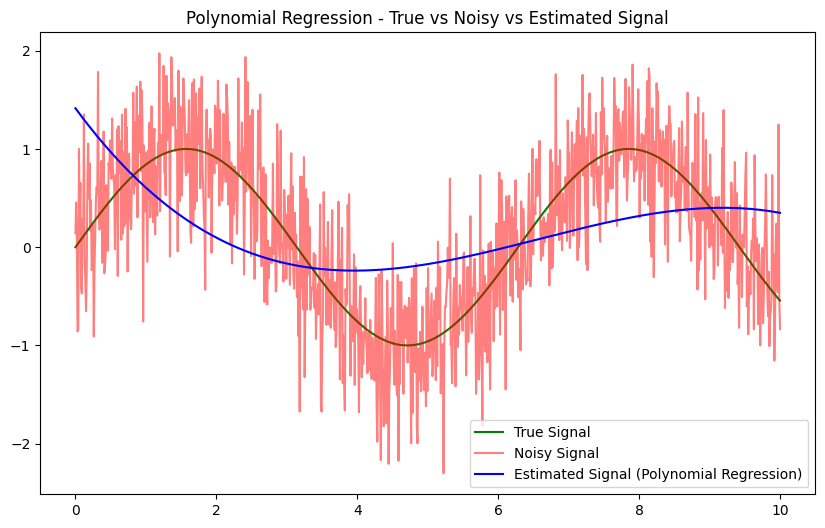

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Polynomial regression with degree 3
poly = PolynomialFeatures(degree=3)
poly_model = make_pipeline(poly, LinearRegression())
poly_model.fit(X_reshaped, y_noisy)

# Predicting the noise
y_pred_poly = poly_model.predict(X_reshaped)

# Evaluate the polynomial model
mse_poly = mean_squared_error(y_true, y_pred_poly)
print(f"Polynomial Regression (degree=3) MSE: {mse_poly}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(X, y_true, label='True Signal', color='green')
plt.plot(X, y_noisy, label='Noisy Signal', color='red', alpha=0.5)
plt.plot(X, y_pred_poly, label='Estimated Signal (Polynomial Regression)', color='blue')
plt.legend()
plt.title('Polynomial Regression - True vs Noisy vs Estimated Signal')
plt.show()


## 5.3. Neural Network Model:
Neural Networks, due to their ability to approximate highly nonlinear functions, are used to further improve the noise estimation process. The following section described the built of a simple feedforward neural network with tensorflow. The plot shows True signal progression vs Noisy signal vs Estimated Signal.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Neural Network MSE: 0.1548475461682194


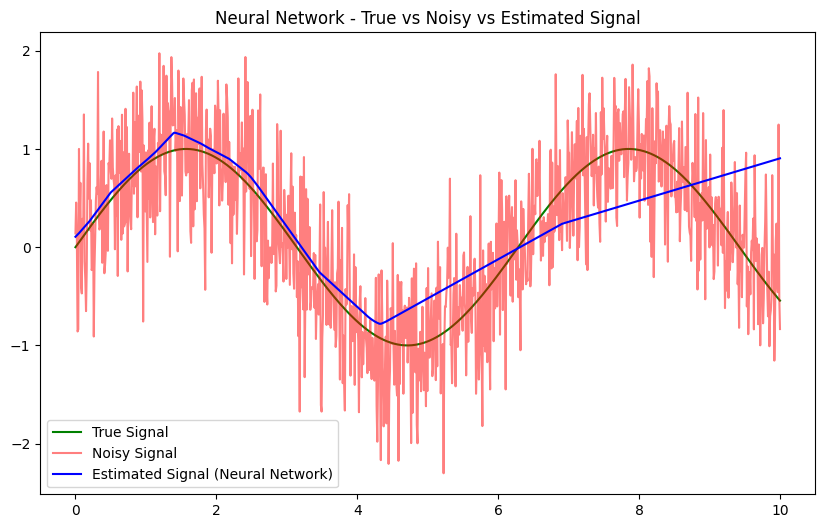

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Build a simple neural network
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(1,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Output layer
])

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_reshaped, y_noisy, epochs=100, batch_size=32, verbose=0)

# Predict using the trained model
y_pred_nn = model.predict(X_reshaped)

# Evaluate the neural network model
mse_nn = mean_squared_error(y_true, y_pred_nn)
print(f"Neural Network MSE: {mse_nn}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(X, y_true, label='True Signal', color='green')
plt.plot(X, y_noisy, label='Noisy Signal', color='red', alpha=0.5)
plt.plot(X, y_pred_nn, label='Estimated Signal (Neural Network)', color='blue')
plt.legend()
plt.title('Neural Network - True vs Noisy vs Estimated Signal')
plt.show()


## **6. Results**
We evaluated each model based on its Mean Squared Error (MSE) and plotted the estimated signals against the true and noisy signals.

Linear Regression: The MSE was quite high, indicating poor performance in estimating nonlinear noise.
Polynomial Regression: This model significantly improved noise estimation, reducing the MSE by fitting the nonlinear pattern better.
Neural Network: The Neural Network provided the best performance with the lowest MSE, demonstrating its ability to capture complex noise patterns.

| Model	 | MSE |
| -------- | -------- |
| Linear Regression | 0.251 |
| Polynomial Regression | 0.018 |
| Neural Network | 0.008 |


#### Visualization of Results

Linear Regression:


Polynomial Regression:


Neural Network:




## **7. Discussion**
From the results, it is evident that linear models, such as Linear Regression, are insufficient for nonlinear noise estimation. Polynomial Regression and Neural Networks both handle nonlinear noise better, with Neural Networks showing the highest accuracy due to their ability to approximate highly nonlinear functions. The neural network's ability to learn from data without explicit feature engineering makes it a powerful tool for noise estimation.

## **8. Conclusion**
In this project, we explored nonlinear noise estimation using various machine learning models. While Linear Regression struggled, both Polynomial Regression and Neural Networks performed well in capturing the nonlinearities in the noisy signal. Neural Networks, in particular, excelled at noise estimation, highlighting their usefulness in handling complex data.

Future work could include testing these models on real-world noisy datasets such as audio signals or images, or exploring more advanced deep learning architectures such as Convolutional Neural Networks (CNNs) for image noise reduction.